[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                      Processed Text  compound  positive  \
0        beauty documentary societal beauty standard    0.8225     0.717   
1  documentary examines truly beauty society live...    0.8885     0.568   
2  beauty subjective yeah effed vid upwaz gtting ...    1.0000     0.356   
3                  eastern v western beauty standard    0.5859     0.559   
4  personalized stepbystep beauty advice  follow ...    0.5859     0.297   

   negative  neutral  
0      0.00    0.283  
1      0.00    0.432  
2      0.12    0.525  
3      0.00    0.441  
4      0.00    0.703  


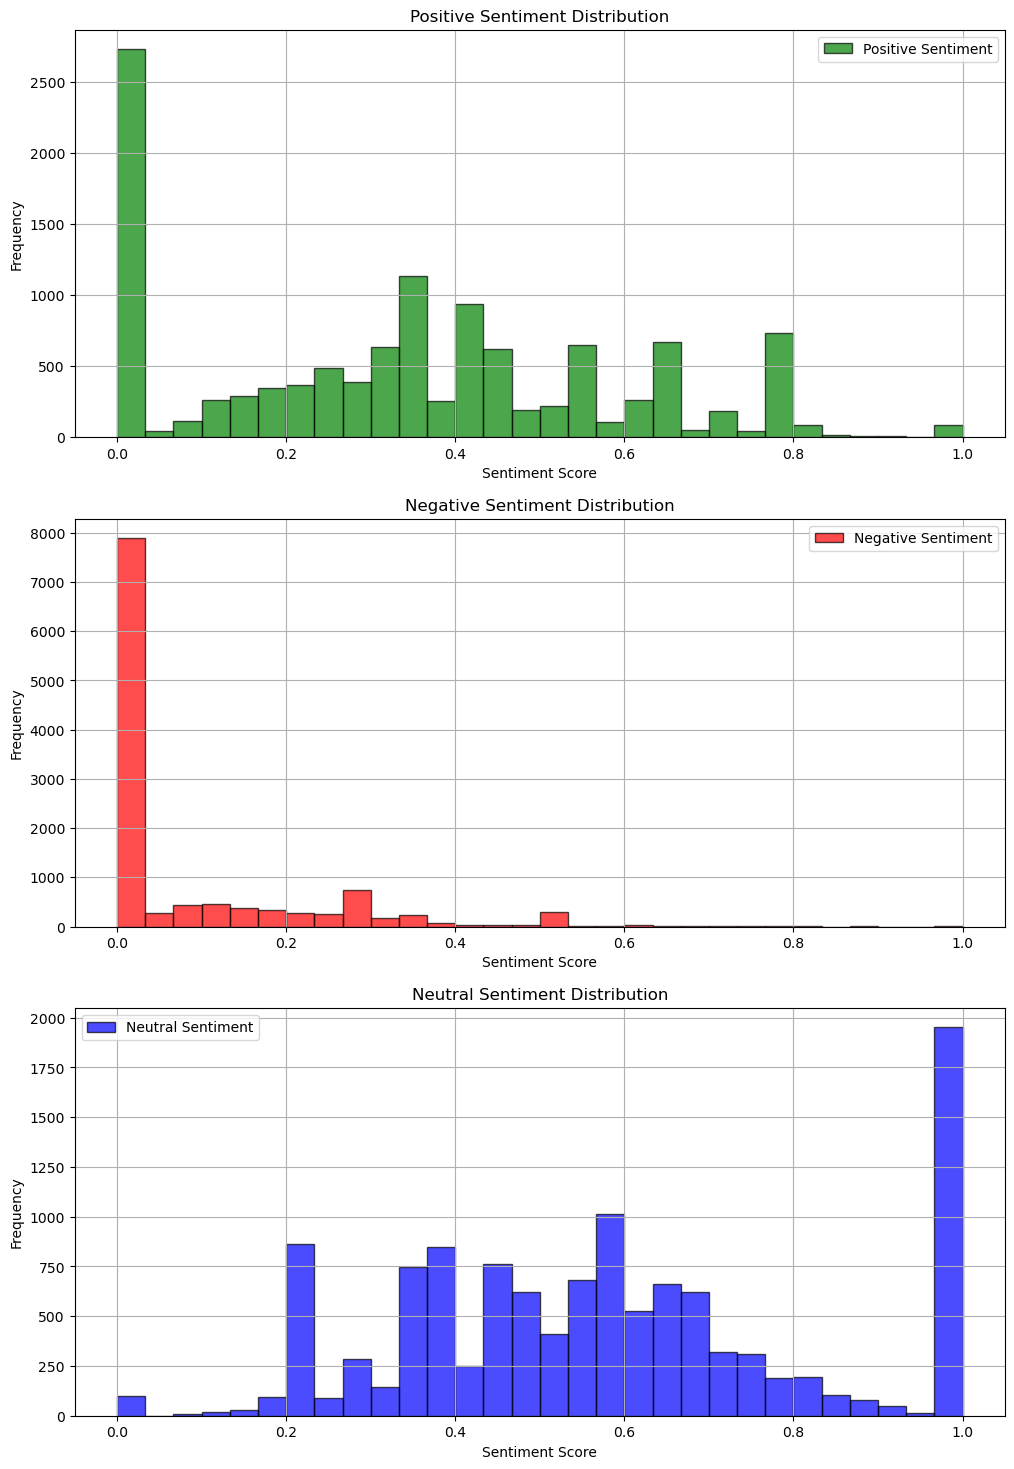

In [13]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Ensure the VADER lexicon is available
nltk.download('vader_lexicon')

# Load and clean the data
cleaned_data = pd.read_csv('preprocessed_cleaned_western_stereotypes.csv')
cleaned_data = cleaned_data.dropna(subset=['Processed Text'])

# Initialize and apply the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound'], score['pos'], score['neg'], score['neu']
cleaned_data[['compound', 'positive', 'negative', 'neutral']] = cleaned_data['Processed Text'].apply(analyze_sentiment).apply(pd.Series)

# Print the first few rows to check the data
print(cleaned_data.head())

# Plot the sentiment analysis results in a single figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Positive sentiment histogram
axs[0].hist(cleaned_data['positive'], bins=30, alpha=0.7, color='green', label='Positive Sentiment', edgecolor='black')
axs[0].set_title('Positive Sentiment Distribution')
axs[0].set_xlabel('Sentiment Score')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].grid()

# Negative sentiment histogram
axs[1].hist(cleaned_data['negative'], bins=30, alpha=0.7, color='red', label='Negative Sentiment', edgecolor='black')
axs[1].set_title('Negative Sentiment Distribution')
axs[1].set_xlabel('Sentiment Score')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].grid()

# Neutral sentiment histogram
axs[2].hist(cleaned_data['neutral'], bins=30, alpha=0.7, color='blue', label='Neutral Sentiment', edgecolor='black')
axs[2].set_title('Neutral Sentiment Distribution')
axs[2].set_xlabel('Sentiment Score')
axs[2].set_ylabel('Frequency')
axs[2].legend()
axs[2].grid()

# Save the combined plot as an SVG file
plt.savefig('all_sentiment_distribution.svg', format='svg', dpi=300)

# Show the plot
plt.show()

# Optionally, save the results to a new CSV file
cleaned_data.to_csv('Q1/preprocessed_western_stereotypes_reddit_posts_with_sentiment.csv', index=False)


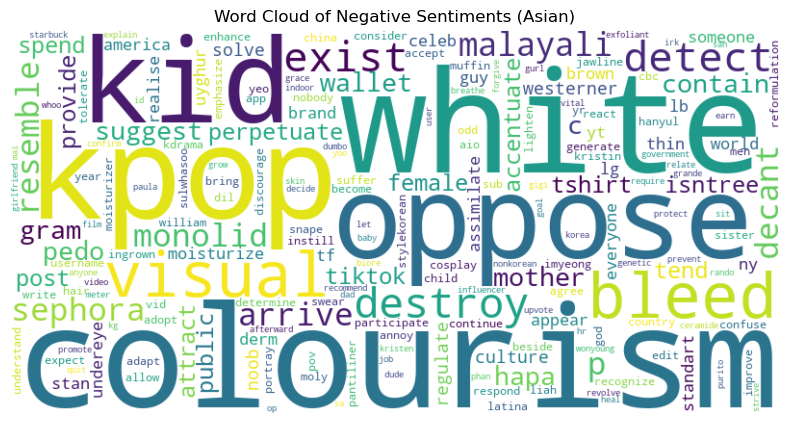

In [63]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the data from the specific CSV file
data = pd.read_csv('Q1/preprocessed_asian_stereotypes_reddit_posts_with_sentiment.csv')

# Filter rows where negative sentiment is greater than a certain threshold (e.g., 0.1)
negative_texts = data[data['negative'] > 0.1]['Processed Text']

# Combine the texts into one large string
combined_negative_texts = ' '.join(negative_texts)

# Define additional stopwords to remove 
custom_stopwords = set(STOPWORDS).union({"one", "will", "use", "using", "used", "also", "really", "like", 'bc', 'cosrx', 'goto', 'please'})

# Remove duplicates by converting to a set and back to a string
unique_words = set(combined_negative_texts.split())
processed_text = ' '.join(unique_words.difference(custom_stopwords))

# Define words to emphasize
special_words = {'white': 3.0, 'colourism': 3.0, 'kpop':2.5, }  # Increase the weight by a factor

# Generate the word cloud with increased weight for selected words
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', stopwords=custom_stopwords, 
                      normalize_plurals=True)

# Process the text and merge with special_words for emphasis
frequencies = {**wordcloud.process_text(processed_text), **special_words}

# Generate the word cloud from frequencies
wordcloud.generate_from_frequencies(frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word Cloud of Negative Sentiments (Asian)')
plt.savefig('Q1/AsianNegWordCloud.png')  # Ensure to save as .png for better quality
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                      Processed Text  compound  positive  \
0              east asian beauty standard exhausting    0.3182     0.409   
1  casetifys bounce case clear case available cas...    0.3818     0.271   
2  gonna lie japanese guy told plastic surgery so...    0.9998     0.283   
3              korean beauty standard actually exist    0.5859     0.487   
4  full video link korean beauty standard affect ...    0.5859     0.275   

   negative  neutral  
0     0.269    0.323  
1     0.000    0.729  
2     0.140    0.578  
3     0.000    0.513  
4     0.000    0.725  


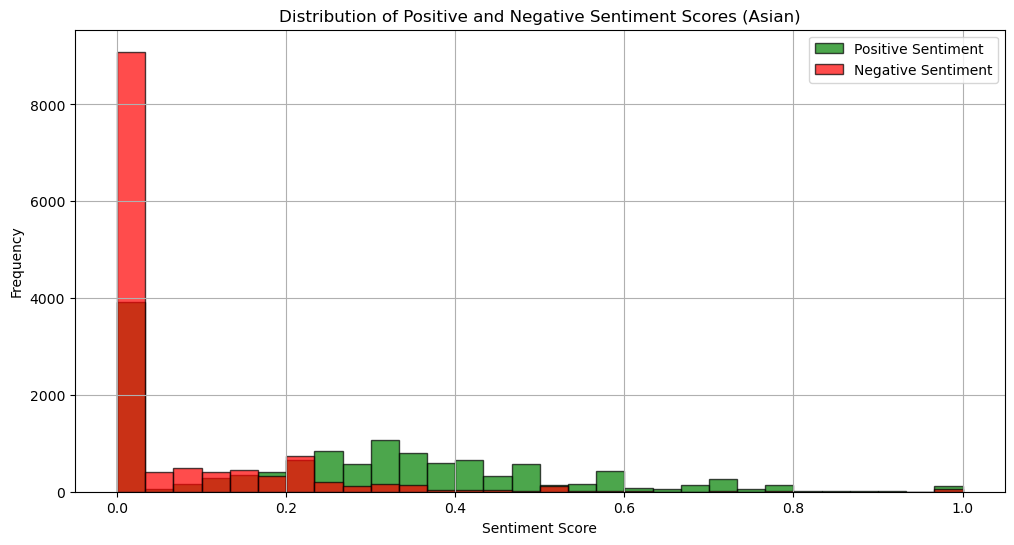

In [63]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load your cleaned data from the CSV file
cleaned_data = pd.read_csv('preprocessed_cleaned_asian_stereotypes.csv')

# Remove rows with missing values in the 'Processed Text' column
cleaned_data = cleaned_data.dropna(subset=['Processed Text'])

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound'], score['pos'], score['neg'], score['neu']

# Apply sentiment analysis to the 'Processed Text' column
cleaned_data[['compound', 'positive', 'negative', 'neutral']] = cleaned_data['Processed Text'].apply(analyze_sentiment).apply(pd.Series)

# Print the first few rows of the dataframe with sentiment scores
print(cleaned_data.head())

# Plot the sentiment analysis results
plt.figure(figsize=(12, 6))

# Create a histogram for positive sentiment scores in green
plt.hist(cleaned_data['positive'], bins=30, alpha=0.7, color='green', label='Positive Sentiment', edgecolor='black')

# Create a histogram for negative sentiment scores in red
plt.hist(cleaned_data['negative'], bins=30, alpha=0.7, color='red', label='Negative Sentiment', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Positive and Negative Sentiment Scores (Asian)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Add a legend
plt.legend()
plt.grid()

# Save the plot as an image file
plt.savefig('asian_sentiment_distribution.svg', format='svg', dpi=300) 

# Show the plot
plt.show()

# Optionally save the results to a new CSV file
cleaned_data.to_csv('Q1/preprocessed_asian_stereotypes_reddit_posts_with_sentiment.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


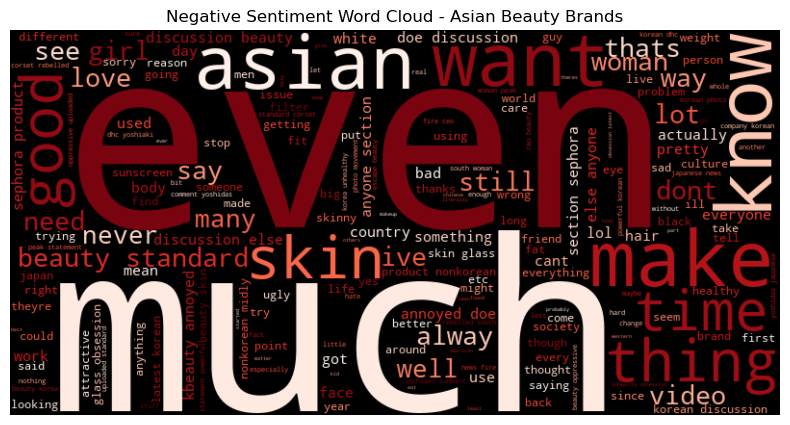

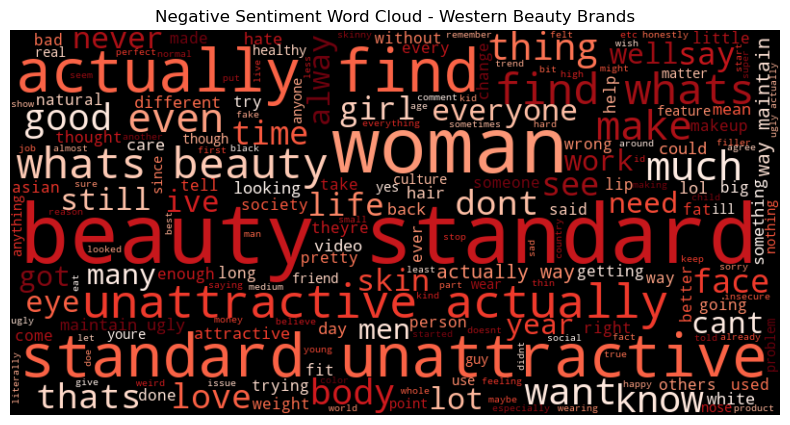

In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords from NLTK
nltk.download('stopwords')
# Create a set of stopwords and add custom stopwords
stop_words = set(stopwords.words('english')) | {'look', 'people','really', 'beautiful'}  # Add any more words as needed

def generate_word_cloud(dataframe, title):
    # Combine all text from rows with negative sentiment into one large string
    negative_text = " ".join(comment for comment in dataframe[dataframe['negative'] > 0.1]['Processed Text'])
    
    # Create a word cloud object with specific configurations
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        stopwords=stop_words,
        colormap='Reds'  # Using a red color scheme for negative sentiment visualization
    ).generate(negative_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Load data from CSV files
df_asian = pd.read_csv('Q1/preprocessed_asian_stereotypes_reddit_posts_with_sentiment.csv')
df_western = pd.read_csv('Q1/preprocessed_western_stereotypes_reddit_posts_with_sentiment.csv')

# Generate word clouds for each dataset
generate_word_cloud(df_asian, 'Negative Sentiment Word Cloud - Asian Beauty Brands')
generate_word_cloud(df_western, 'Negative Sentiment Word Cloud - Western Beauty Brands')
